<a href="https://colab.research.google.com/github/nirajitpramanik/machine-vision-lab/blob/main/Lab-02-Image%20Arithmetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

## Task-1: Image Arithmetic

### Manual Image addition and subtraction
This is done by individually accessing the pixels and adding or removing them with for loops for every dimension.

In [ ]:
def add_images_manually(image1, image2):
  """
  Images are manually added one over another by accessing the pixels individually.
  """

  #Taking minimum height and width to remove any errors due to sizes
  height = min(image1.shape[0], image2.shape[0])
  width = min(image1.shape[1], image2.shape[1])

  result_image = np.zeros((height, width, 3), dtype=np.uint8)

  #Manually transposing the pixels
  for y in range(height):
    for x in range(width):
      for c in range(3):
        result_image[y, x, c] = min(255, image1[y, x, c] + image2[y, x, c])

  return result_image

<ipython-input-12-07e4f6951116>:10: RuntimeWarning: overflow encountered in scalar add
  result_image[y, x, c] = min(255, image1[y, x, c] + image2[y, x, c])


(-0.5, 611.5, 381.5, -0.5)

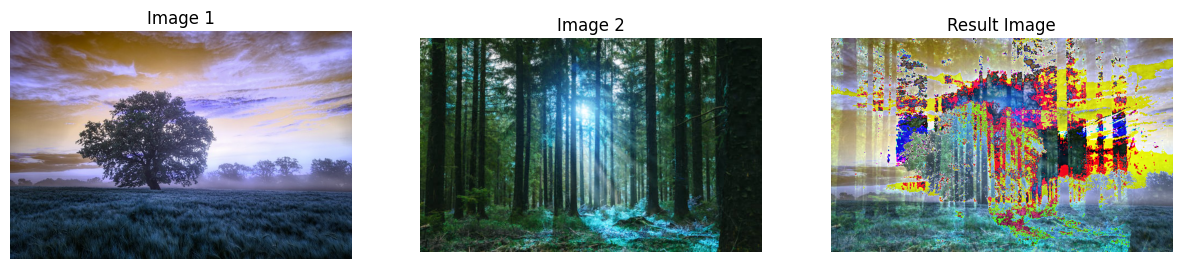

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Images for MV/P1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Images for MV/P4.jpg')

add_manual = add_images_manually(image1, image2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(add_manual)
plt.title('Result Image')
plt.axis('off')

In [ ]:
def subtract_images_manually(image1, image2):
  """
  Images are manually subtracted one from another by accessing the pixels individually.
  """

  #Taking minimum height and width to remove any errors due to sizes
  height = min(image1.shape[0], image2.shape[0])
  width = min(image1.shape[1], image2.shape[1])

  result_image = np.zeros((height, width, 3), dtype=np.uint8)

  #Manually transposing the pixels
  for y in range(height):
    for x in range(width):
      for c in range(3):
        result_image[y, x, c] = max(0, image1[y, x, c] - image2[y, x, c])

  return result_image

<ipython-input-14-047bedb77a9b>:13: RuntimeWarning: overflow encountered in scalar subtract
  result_image[y, x, c] = max(0, image1[y, x, c] - image2[y, x, c])


(-0.5, 611.5, 381.5, -0.5)

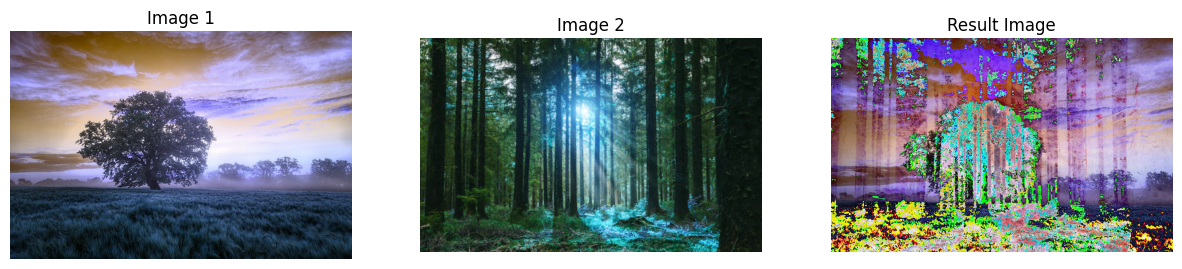

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Images for MV/P1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Images for MV/P4.jpg')

sub_manual = subtract_images_manually(image1, image2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sub_manual)
plt.title('Result Image')
plt.axis('off')

### Addition and Subtraction using OpenCV
Performing the same tasks using OpenCV

In [ ]:
def add_images_opencv(image1, image2):
  """
  Adds two images using OpenCV's cv2.add function.
  """

  #Taking minimum height and width to remove any errors due to sizes
  height = min(image1.shape[0], image2.shape[0])
  width = min(image1.shape[1], image2.shape[1])

  image1_resized = cv2.resize(image1, (width, height))
  image2_resized = cv2.resize(image2, (width, height))

  result_image = cv2.add(image1_resized, image2_resized)
  return result_image

(-0.5, 611.5, 381.5, -0.5)

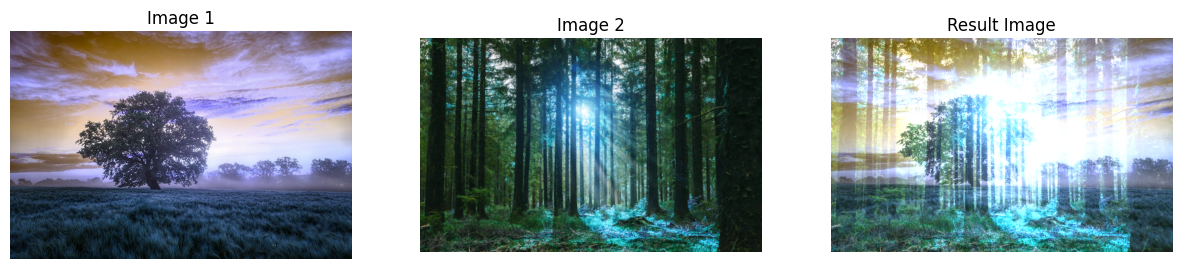

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Images for MV/P1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Images for MV/P4.jpg')

add_auto = add_images_opencv(image1, image2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(add_auto)
plt.title('Result Image')
plt.axis('off')

In [ ]:
def subtract_images_opencv(image1, image2):
  """
  Subtracts two images using OpenCV's cv2.subtract function.
  """

  #Taking minimum height and width to remove any errors due to sizes
  height = min(image1.shape[0], image2.shape[0])
  width = min(image1.shape[1], image2.shape[1])

  image1_resized = cv2.resize(image1, (width, height))
  image2_resized = cv2.resize(image2, (width, height))

  result_image = cv2.subtract(image1_resized, image2_resized)
  return result_image

(-0.5, 611.5, 381.5, -0.5)

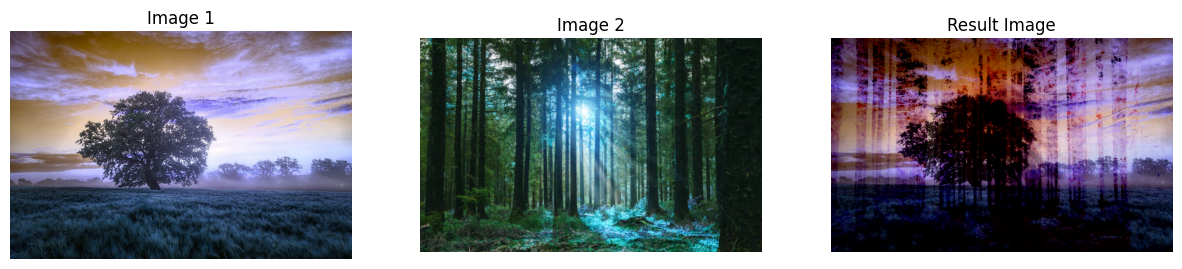

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/Images for MV/P1.jpg')
image2 = cv2.imread('/content/drive/MyDrive/Images for MV/P4.jpg')

sub_auto = subtract_images_opencv(image1, image2)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sub_auto)
plt.title('Result Image')
plt.axis('off')

## Task-2: Mean Filter Implementation

### Without using CV (Manual Method)

In [ ]:
def mean_filter_manual(image, kernel_size):
  """
  Manually shifting the paddings of the particular pixel along with the neighbouring ones according to filter size to create a Gaussian blur.
  """
  height, width = image.shape[:2]

  padding = kernel_size // 2

  padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

  filtered_image = np.zeros_like(image)

  #Manually transposing the pixels
  for i in range(height):
      for j in range(width):
          kernel_region = padded_image[i:i + kernel_size, j:j + kernel_size]

          mean_value = np.mean(kernel_region, axis=(0, 1))

          filtered_image[i, j] = mean_value

  return filtered_image

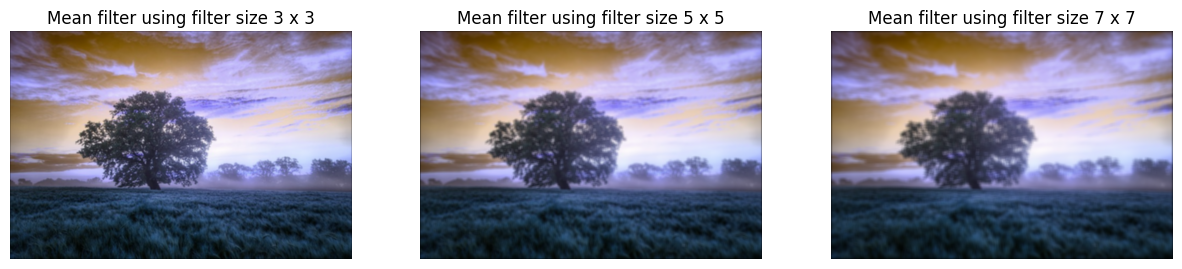

In [ ]:
inp = cv2.imread('/content/drive/MyDrive/Images for MV/P1.jpg')
counter = 1
plt.figure(figsize=(15, 5))

for i in [3, 5, 7]:
  image = mean_filter_manual(inp, i)

  plt.subplot(1, 3, counter)
  plt.title(f'Mean filter using filter size {i} x {i}')
  plt.axis('off')
  plt.imshow(image)

  counter += 1

###Using CV2 (cv2.blur())

In [ ]:
def mean_filter_auto(image, kernel_size):
  """
  Applies a mean filter to an image using OpenCV's cv2.blur() function.
  """
  blurred_image = cv2.blur(image, (kernel_size, kernel_size))

  return blurred_image

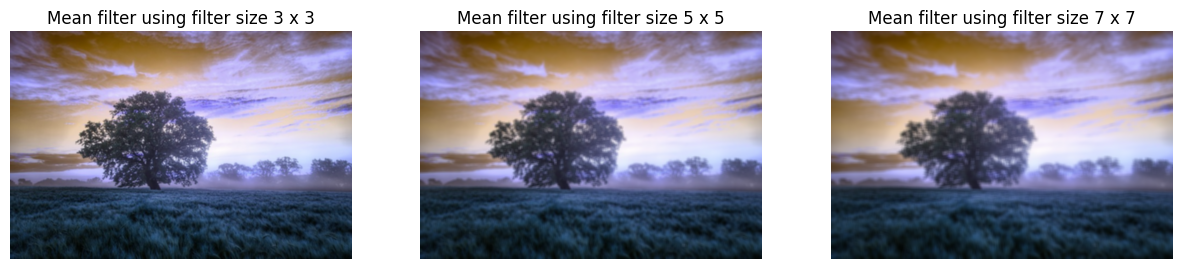

In [ ]:
inp = cv2.imread('/content/drive/MyDrive/Images for MV/P1.jpg')
counter = 1
plt.figure(figsize=(15, 5))

for i in [3, 5, 7]:
  image = mean_filter_auto(inp, i)

  plt.subplot(1, 3, counter)
  plt.title(f'Mean filter using filter size {i} x {i}')
  plt.axis('off')
  plt.imshow(image)

  counter += 1